<a href="https://colab.research.google.com/github/ElisaVianey13/DSC/blob/main/TUGAS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

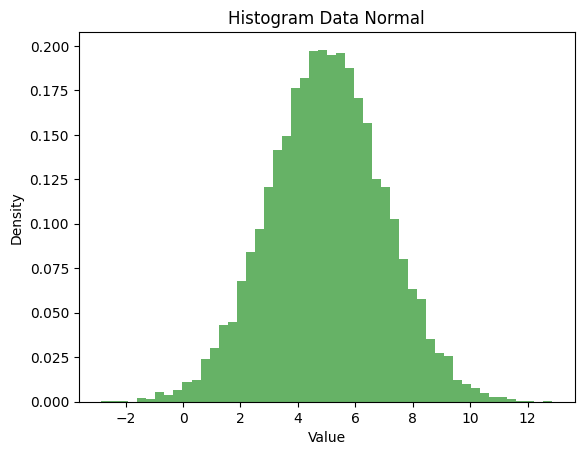

In [ ]:
#####Generate Data Normal####

import numpy as np
import matplotlib.pyplot as plt

# Set parameter distribusi normal
mu_true = 5
sigma_true = 2

# Generate 10.000 data normal
np.random.seed(42)
data = np.random.normal(mu_true, sigma_true, 10000)

# Visualisasi histogram data
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')
plt.title("Histogram Data Normal")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


Output()

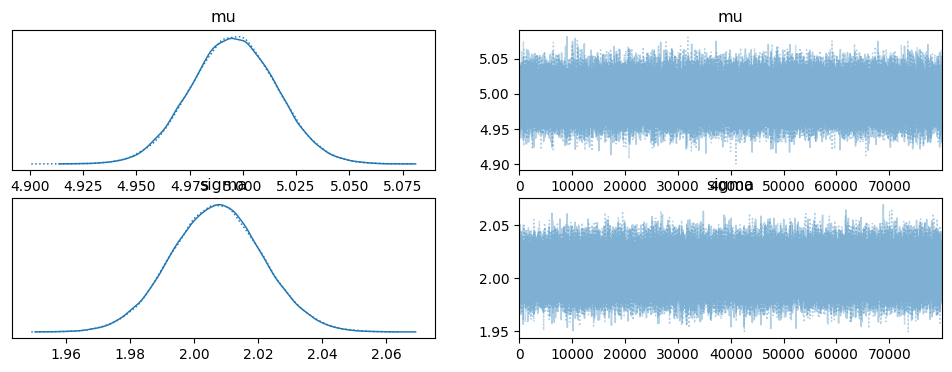

In [ ]:
####Estimasi Parameter dengan Slice Sampling####

import pymc as pm

with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    likelihood = pm.Normal("obs", mu=mu, sigma=sigma, observed=data)

    # Sampling menggunakan Slice Sampling
    trace_slice = pm.sample(80000, step=pm.Slice(), return_inferencedata=True)

# Plot Trace Plot
pm.plot_trace(trace_slice)
plt.show()


Output()

/usr/local/lib/python3.11/dist-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered 
in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),

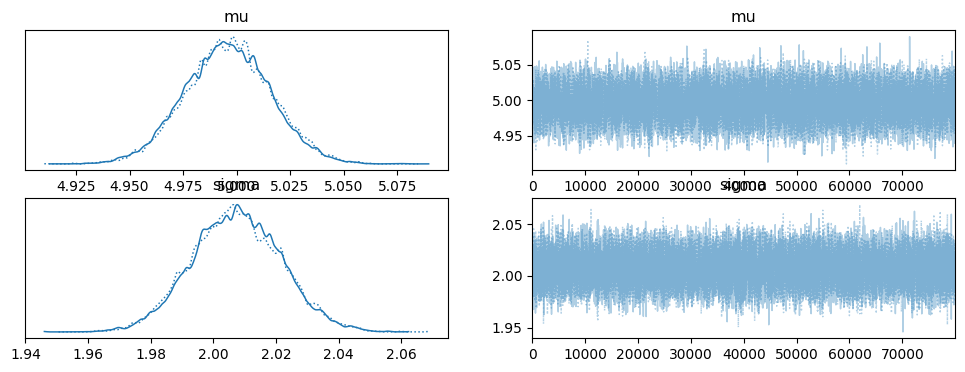

In [ ]:
###Estimasi dengan Metropolis-Hastings (MH)###

with pm.Model() as model_mh:
    mu = pm.Normal("mu", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    likelihood = pm.Normal("obs", mu=mu, sigma=sigma, observed=data)

    # Sampling menggunakan Metropolis-Hastings
    step = pm.Metropolis()
    trace_mh = pm.sample(80000, step=step, return_inferencedata=True)

# Plot Trace Plot
pm.plot_trace(trace_mh)
plt.show()


In [ ]:
####Evaluasi Konvergensi (Sesuai Jurnal Susanto)###

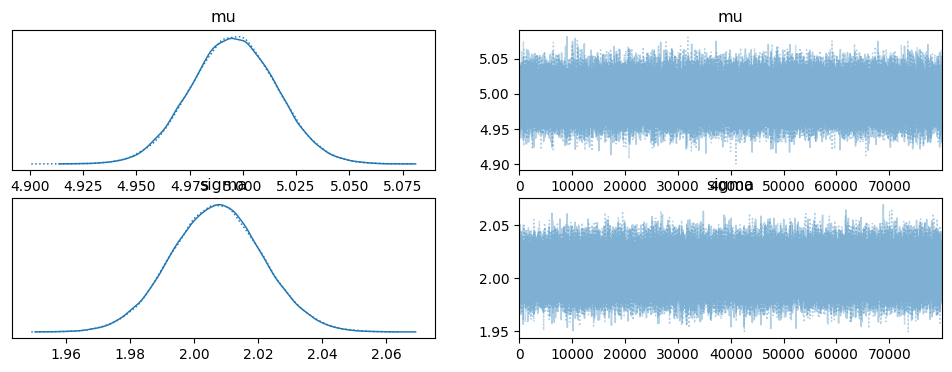

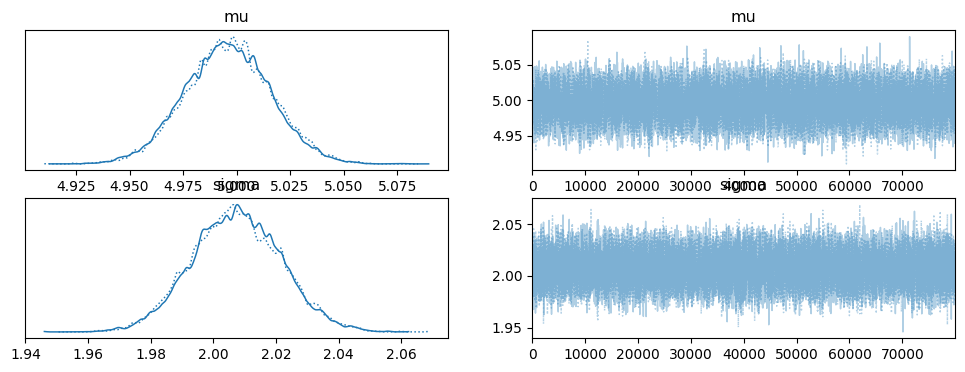

In [ ]:
###a. Trace Plot

pm.plot_trace(trace_slice)
pm.plot_trace(trace_mh)
plt.show()


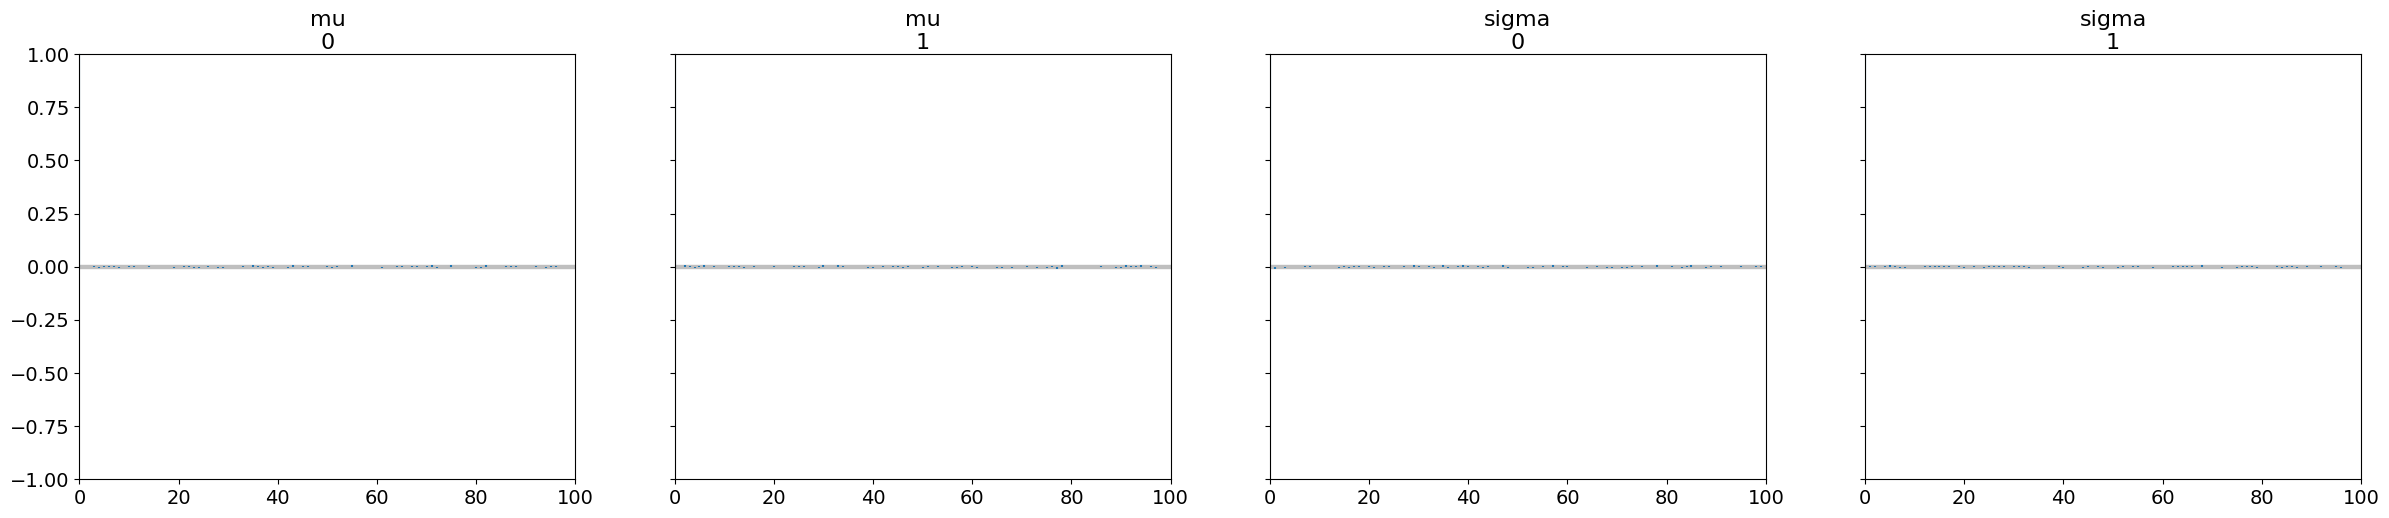

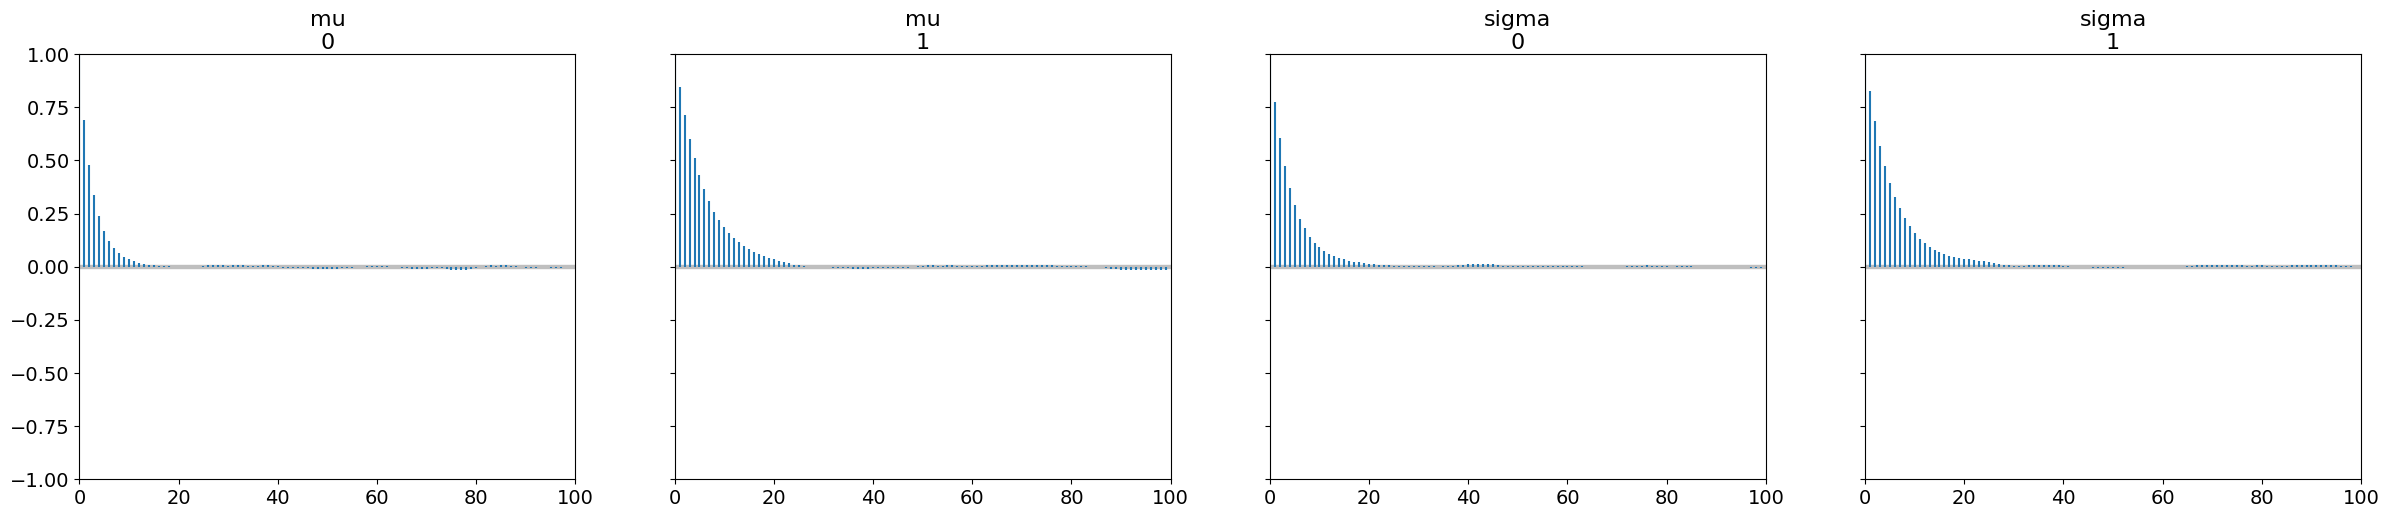

In [ ]:
###b. Autokorelasi

import arviz as az

az.plot_autocorr(trace_slice, var_names=["mu", "sigma"])
az.plot_autocorr(trace_mh, var_names=["mu", "sigma"])
plt.show()


In [ ]:
###Gelman-Rubin Diagnostic (R-hat)

print("R-hat Slice Sampling:")
print(az.rhat(trace_slice))

print("\nR-hat Metropolis-Hastings:")
print(az.rhat(trace_mh))


R-hat Slice Sampling:
<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    mu       float64 8B 1.0
    sigma    float64 8B 1.0

R-hat Metropolis-Hastings:
<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    mu       float64 8B 1.0
    sigma    float64 8B 1.0


In [ ]:
####d. Effective Sample Size (ESS)###
print("ESS Slice Sampling:")
print(az.ess(trace_slice))

print("\nESS Metropolis-Hastings:")
print(az.ess(trace_mh))


ESS Slice Sampling:
<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    mu       float64 8B 1.584e+05
    sigma    float64 8B 1.607e+05

ESS Metropolis-Hastings:
<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    mu       float64 8B 1.816e+04
    sigma    float64 8B 1.628e+04


In [12]:
###Estimasi Parameter Regresi###

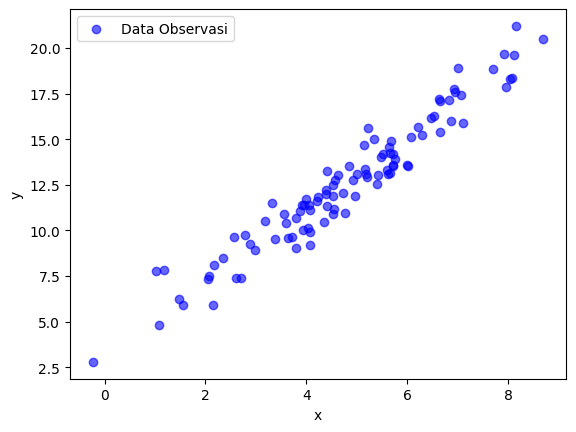

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Buat data x secara acak
x = np.random.normal(loc=5, scale=2, size=100)

# Tentukan beta_0 dan beta_1 yang sebenarnya
beta_0_true = 3
beta_1_true = 2

# Buat y dengan noise (error)
y = beta_0_true + beta_1_true * x + np.random.normal(0, 1, size=100)

# Visualisasi scatter plot data
plt.scatter(x, y, label="Data Observasi", color='b', alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


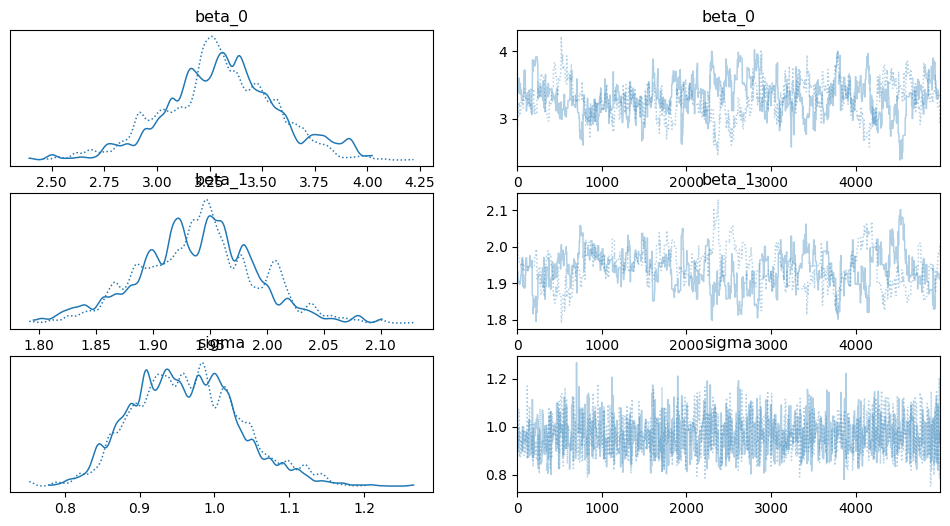

In [15]:
import pymc as pm

with pm.Model() as model_mh:
    # Prior untuk beta_0 dan beta_1
    beta_0 = pm.Normal("beta_0", mu=0, sigma=10)
    beta_1 = pm.Normal("beta_1", mu=0, sigma=10)

    # Prior untuk error sigma
    sigma = pm.HalfNormal("sigma", sigma=10)

    # Model Regresi
    y_pred = beta_0 + beta_1 * x

    # Likelihood
    likelihood = pm.Normal("y", mu=y_pred, sigma=sigma, observed=y)

    # Sampling dengan Metropolis-Hastings
    step = pm.Metropolis()
    trace_mh = pm.sample(5000, step=step, return_inferencedata=True)

# Plot hasil estimasi parameter
pm.plot_trace(trace_mh)
plt.show()


Output()

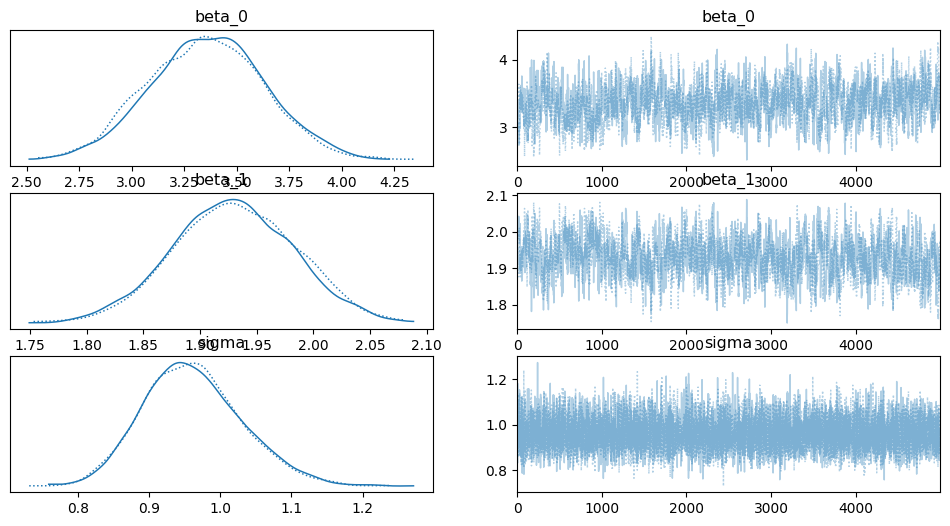

In [16]:
with pm.Model() as model_slice:
    # Prior untuk beta_0 dan beta_1
    beta_0 = pm.Normal("beta_0", mu=0, sigma=10)
    beta_1 = pm.Normal("beta_1", mu=0, sigma=10)

    # Prior untuk error sigma
    sigma = pm.HalfNormal("sigma", sigma=10)

    # Model Regresi
    y_pred = beta_0 + beta_1 * x

    # Likelihood
    likelihood = pm.Normal("y", mu=y_pred, sigma=sigma, observed=y)

    # Sampling dengan Slice Sampling
    trace_slice = pm.sample(5000, step=pm.Slice(), return_inferencedata=True)

# Plot hasil estimasi parameter
pm.plot_trace(trace_slice)
plt.show()


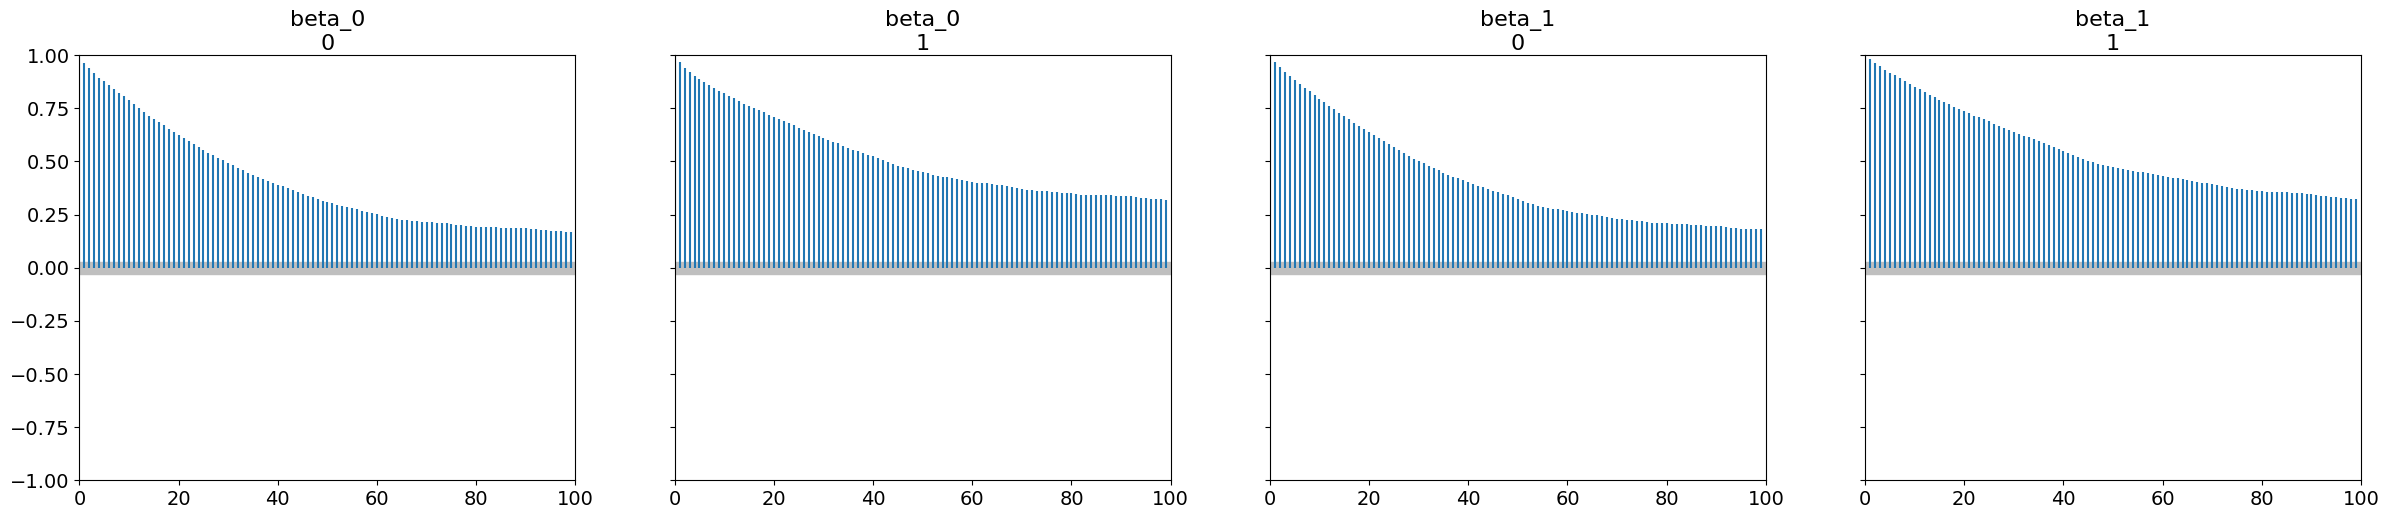

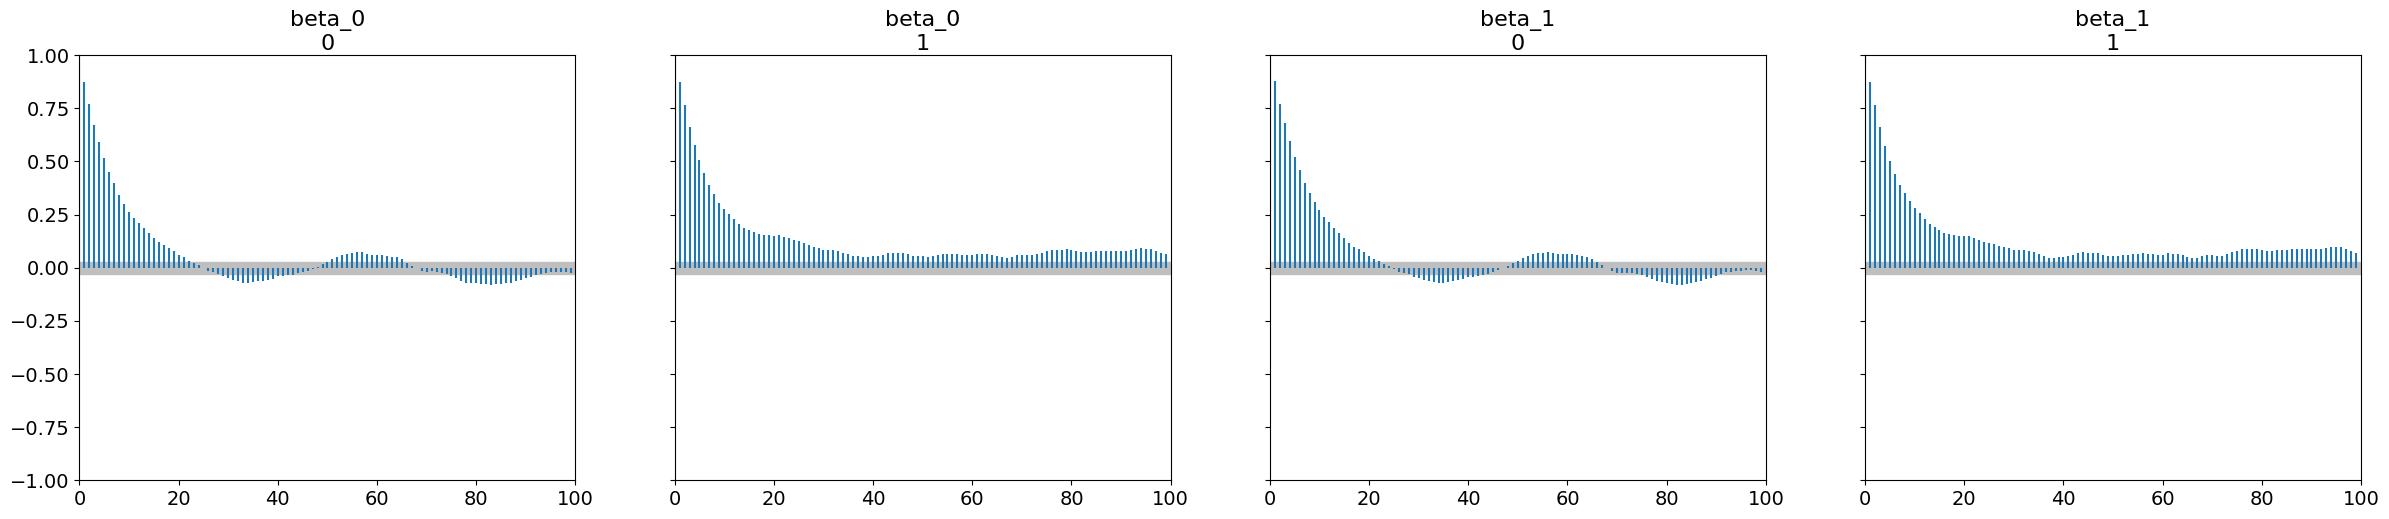

In [17]:
import arviz as az

# Cek autokorelasi untuk kedua metode
az.plot_autocorr(trace_mh, var_names=["beta_0", "beta_1"])
az.plot_autocorr(trace_slice, var_names=["beta_0", "beta_1"])
plt.show()


In [18]:
print("ESS Metropolis-Hastings:")
print(az.ess(trace_mh))

print("\nESS Slice Sampling:")
print(az.ess(trace_slice))


ESS Metropolis-Hastings:
<xarray.Dataset> Size: 24B
Dimensions:  ()
Data variables:
    beta_0   float64 8B 72.95
    beta_1   float64 8B 70.46
    sigma    float64 8B 1.246e+03

ESS Slice Sampling:
<xarray.Dataset> Size: 24B
Dimensions:  ()
Data variables:
    beta_0   float64 8B 544.1
    beta_1   float64 8B 564.1
    sigma    float64 8B 9.267e+03


In [19]:
print("R-hat Metropolis-Hastings:")
print(az.rhat(trace_mh))

print("\nR-hat Slice Sampling:")
print(az.rhat(trace_slice))


R-hat Metropolis-Hastings:
<xarray.Dataset> Size: 24B
Dimensions:  ()
Data variables:
    beta_0   float64 8B 1.013
    beta_1   float64 8B 1.015
    sigma    float64 8B 1.002

R-hat Slice Sampling:
<xarray.Dataset> Size: 24B
Dimensions:  ()
Data variables:
    beta_0   float64 8B 1.015
    beta_1   float64 8B 1.016
    sigma    float64 8B 1.0
